# Imputation

Missing data is a common issue in datasets. There are many approaches that can be used to address this issue, varying in complexity and accuracy. Deleting rows with missing values or predictors with high sparcity is a simple solution. However, this may result in a loss of useful data.

Instead, different imputation methods will be explored and tested on a sample dataset. This imputation methods include the following:

- Univariate feature imputation (mode, median, mean)
- Multivariate feature imputation (KNN imputation, MICE imputation)


## Dataset

To demonstate an example of using imputation to fill missing data, the Financial Indicators of US Stocks dataset from Kaggle will be used. This data contains over 200 numerical predictors with many missing values. 

In [1]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.read_csv(r"2018_Financial_Data.csv")

Let's take a look at the missing data in this dataset. The following table indicates the percentage of missing values in each predictor column. Columns like operatingCycle and cashConversionCycle are mostly sparse, so they may be dropped and replaced with a column indicating that they were missing. 

Predictors with less sparcity will remain in the model and their missing values will be imputed.

In [25]:
null_columns=df.columns[df.isnull().any()]
(pd.DataFrame(df[null_columns].isnull().sum() / len(df))
 .sort_values(0, ascending = False))

,0
operatingCycle,0.998634
cashConversionCycle,0.998634
shortTermCoverageRatios,0.438525
10Y Shareholders Equity Growth (per Share),0.385929
dividendPayoutRatio,0.377505
...,...
Operating Income,0.007969
Long-term debt,0.006831
Net cash flow / Change in cash,0.005464
Retained earnings (deficit),0.004781


## Visualize Missing Data

Another useful way of looking at missing values is by visualizing the missing data. This helps reveal any trends in missing data. From the plot below, it can be noted that certain features are missing for the same rows. It also reveals which fields are consistently empty and which fields are less sparse.

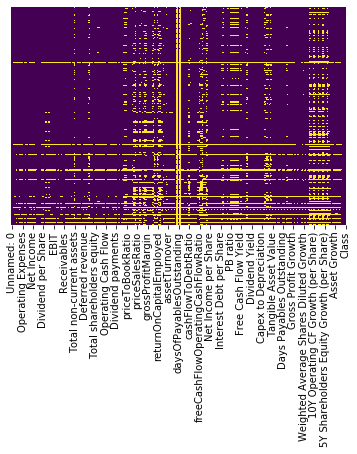

In [29]:
# Importing the libraries 
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Filling Missing Data

https://scikit-learn.org/stable/modules/impute.html
https://bookdown.org/max/FES/imputation-methods.html